<a href="https://colab.research.google.com/github/Untick/IrisID_gr2/blob/Gaidash-Alexey-folder/Gaidash%20Aleksey/%D0%94%D0%BE%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# Загрузка датасета из облака
import gdown
gdown.download('https://drive.google.com/uc?id=1CUe9HZAsGQPCqySZX7zuyJDiS3fqpyBc&authuser', None, quiet=True)

'1920x1080.zip'

In [2]:
# Распаковываем архив Iris_ID.zip в папку Iris_ID
!unzip -q 1920x1080.zip

In [3]:
# импортируем модули
import os;
import shutil;
from PIL import Image;
import numpy as np;
from tensorflow.keras import utils;
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import random

In [4]:
# подготовим метки
base_path = '/content/1920x1080';
dataset_path = 'dataset';
labels = [];

for base_dir in os.listdir(base_path):
  for inner_dir in os.listdir(base_path + '/' + base_dir):
    for i_d in os.listdir(base_path + '/' + base_dir + '/' + inner_dir):
      if i_d == 'full':
        for im_name in os.listdir(base_path + '/' + base_dir + '/' + inner_dir + '/' + i_d):
          splited = im_name.split('_');
          name = splited[0] + splited[1];
          dir = dataset_path + '/' + name;

          if os.path.exists(dir) == False:
            os.makedirs(dir);

          labels.append(name);
          shutil.move(base_path + '/' + base_dir + '/' + inner_dir + '/' + i_d + '/' + im_name, dir);

print(labels);

['24right', '24right', '24right', '24right', '24right', '24right', '24right', '24right', '24left', '24left', '24left', '24left', '24left', '24left', '24left', '24left', '14right', '14right', '14right', '14right', '14right', '14right', '14right', '14right', '14left', '14left', '14left', '14left', '14left', '14left', '14left', '14left', '25right', '25right', '25right', '25right', '25right', '25right', '25right', '25right', '25left', '25left', '25left', '25left', '25left', '25left', '25left', '25left', '03right', '03right', '03right', '03right', '03right', '03right', '03right', '03right', '03left', '03left', '03left', '03left', '03left', '03left', '03left', '03left', '07right', '07right', '07right', '07right', '07right', '07right', '07right', '07right', '07left', '07left', '07left', '07left', '07left', '07left', '07left', '07left', '10right', '10right', '10right', '10right', '10right', '10right', '10right', '10right', '10left', '10left', '10left', '10left', '10left', '10left', '10left', '

In [14]:
# подготовим датасет
x_train = [];
y_train = [];
NUM_CLASSES = 0;
IMG_WIDTH = 100;
IMG_HEIGHT = 100;

Dirs = os.listdir(dataset_path);

for dir in Dirs:
  for file in os.listdir(dataset_path + '/' + dir):
    im = Image.open(dataset_path + '/' + dir + '/' + file);
    im = im.resize((IMG_WIDTH, IMG_HEIGHT))
    im = im.convert("RGB")

    np_arr = np.array(im);
    x_train.append(np_arr);
    y_train.append(NUM_CLASSES);
  
  NUM_CLASSES += 1;

x_train = np.array(x_train);
x_train = x_train.reshape(x_train.shape[0], 100, 100, 3);

x_train = x_train / 255.;

# отберём 10% на валидационную выборку
index = int(len(x_train) / 10);
x_val = x_train[-index:];

x_val = np.array(x_val);

y_val = y_train[-index:];

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_train = np.array(y_train);

y_val = utils.to_categorical(y_val, NUM_CLASSES);
y_val = np.array(y_val);

rand = list(zip(x_val, y_val))
random.shuffle(rand)
x_val, y_val = zip(*rand)

x_val = np.array(x_val)
y_val = np.array(y_val)

print('Размер массива x_train', x_train.shape);
print('Размер массива y_train', y_train.shape);
print('Размер массива x_train', x_val.shape);
print('Размер массива y_train', y_val.shape);

Размер массива x_train (400, 100, 100, 3)
Размер массива y_train (400, 50)
Размер массива x_train (40, 100, 100, 3)
Размер массива y_train (40, 50)


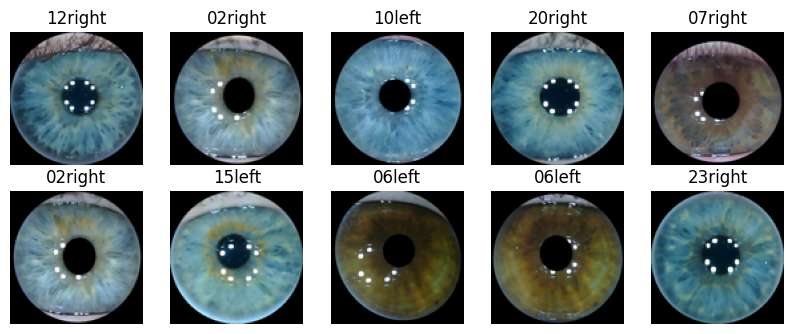

In [15]:
fig = plt.figure(figsize=(10,10))

for i in range(10): 
    n = np.random.randint(0 , x_train.shape[0])
    img = x_train[n];
    ax = fig.add_subplot(5, 5, i+1);
    label = Dirs[np.argmax(y_train[n])];
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show();


In [16]:
# загрузим сохранённую модель
import gdown
gdown.download('https://drive.google.com/uc?id=1JuKEgGlUGbxcJTHoW89w9jqEXXJYqcht&authuser=0', None, quiet=True)

'ident.h5'

In [17]:
model = load_model('/content/ident.h5');

In [18]:
from tensorflow.keras.layers import Dense

model.summary();
model.pop();
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 512)     14336     
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 512)    2048      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 256)       1179904   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 256)      0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                        

In [19]:
from tensorflow.keras.optimizers import Adam

# Компиляция модели
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [20]:
model_hystory = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=50, epochs=25, verbose=1);

Epoch 1/25
8/8 [==============================] - 122s 15s/step - loss: 8.1034 - accuracy: 0.0875 - val_loss: 6.6008 - val_accuracy: 0.0000e+00
Epoch 2/25
8/8 [==============================] - 114s 14s/step - loss: 1.9686 - accuracy: 0.4525 - val_loss: 7.2651 - val_accuracy: 0.0000e+00
Epoch 3/25
8/8 [==============================] - 118s 15s/step - loss: 0.8453 - accuracy: 0.7775 - val_loss: 7.4104 - val_accuracy: 0.0000e+00
Epoch 4/25
8/8 [==============================] - 117s 15s/step - loss: 0.3714 - accuracy: 0.9175 - val_loss: 8.1423 - val_accuracy: 0.0000e+00
Epoch 5/25
8/8 [==============================] - 117s 15s/step - loss: 0.1508 - accuracy: 0.9750 - val_loss: 8.6470 - val_accuracy: 0.0000e+00
Epoch 6/25
8/8 [==============================] - 127s 15s/step - loss: 0.0710 - accuracy: 0.9925 - val_loss: 8.6232 - val_accuracy: 0.0000e+00
Epoch 7/25
8/8 [==============================] - 118s 15s/step - loss: 0.0393 - accuracy: 0.9975 - val_loss: 9.1443 - val_accuracy: 0.0

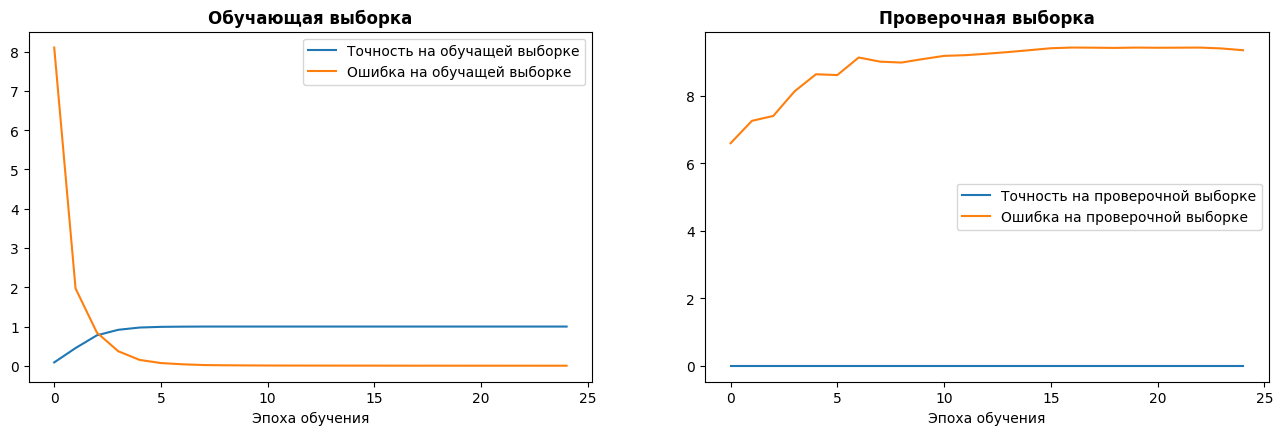

In [21]:
plt.figure(figsize=(16, 10));

plt.subplot(2, 2, 1);
plt.title('Обучающая выборка', fontweight='bold');
plt.plot(model_hystory.history['accuracy'], label='Точность на обучащей выборке');
plt.plot(model_hystory.history['loss'], label='Ошибка на обучащей выборке');
plt.xlabel('Эпоха обучения');
plt.legend()

plt.subplot(2, 2, 2);
plt.title('Проверочная выборка', fontweight='bold');
plt.plot(model_hystory.history['val_accuracy'], label='Точность на проверочной выборке');
plt.plot(model_hystory.history['val_loss'], label='Ошибка на проверочной выборке');
plt.xlabel('Эпоха обучения');
plt.legend();

plt.show();